## 2. Displaying a Well Plot with MatPlotLib

Created by: Andy McDonald

The following tutorial illustrates displaying well data from a CSV on a custom matplotlib plot.

### Loading Well Data from CSV

The following cells load data in from a CSV file and replace the null values (-999.25) with Not a Number (NaN) values. More detail can be found in 1. Loading and Displaying Well Data From CSV.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = '/users/kai/desktop/data_science/data/dongara'

In [3]:
well_name = 'dongara_20'

In [4]:
file_format = '.csv'

In [14]:
well = pd.read_csv(os.path.join(root,well_name+file_format), header=0)

In [15]:
well.replace(-999.25, np.nan, inplace=True)

In [16]:
well.describe()

,DEPT,CALI,DRHO,DT,GR,IND,MLL,NPHI,RHOB,SN,SP
count,12731,9104,2005,8538,12663,9098,1970,1977,2013,9113,9153
unique,12731,7537,845,8426,12610,8707,1965,1970,1568,8768,9093
top,204.0636,10.059,0.0076,81.9812,0.0,3.5764,9.8118,35.7446,2.4738,5.5104,29.5806
freq,1,5,9,3,4,4,2,2,5,4,2


### Setting up the logplot

We can quickly make a log plot using subplot2grid from matplotlib. This allows us to space out multiple plots (tracks) in an easy to understand way. <br><br>

Each track is setup as an axis (ax for short)

In [60]:
cols = well.columns[well.dtypes.eq('object')]

In [62]:
well[cols] = well[cols].apply(pd.to_numeric, errors='coerce')

In [75]:
well.head(10)

,DEPT,CALI,DRHO,DT,GR,IND,MLL,NPHI,RHOB,SN,SP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4572,NaN,NaN,NaN,13.7792,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6096,NaN,NaN,NaN,14.6715,NaN,NaN,NaN,NaN,NaN,NaN
3,0.7620,NaN,NaN,NaN,15.2481,NaN,NaN,NaN,NaN,NaN,NaN
4,0.9144,NaN,NaN,NaN,14.8619,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0668,NaN,NaN,NaN,13.6161,NaN,NaN,NaN,NaN,NaN,NaN
6,1.2192,NaN,NaN,NaN,11.8116,NaN,NaN,NaN,NaN,NaN,NaN
7,1.3716,NaN,NaN,NaN,10.2286,NaN,NaN,NaN,NaN,NaN,NaN
8,1.5240,NaN,NaN,NaN,8.9049,NaN,NaN,NaN,NaN,NaN,NaN
9,1.6764,NaN,NaN,NaN,7.8831,NaN,NaN,NaN,NaN,NaN,NaN


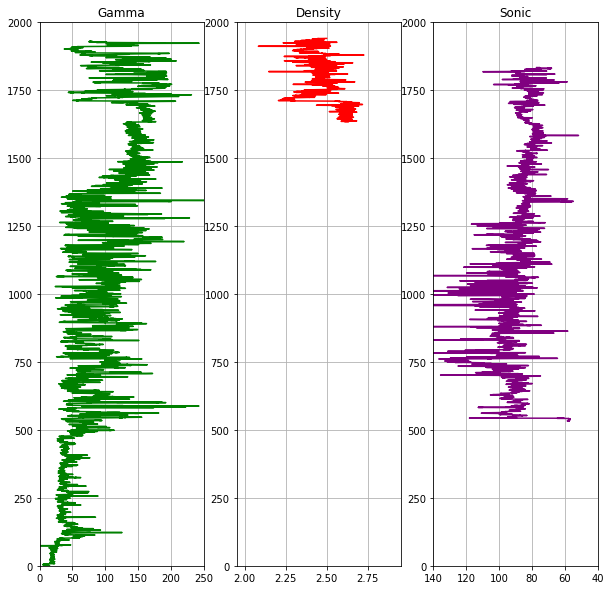

In [67]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPT", data = well, color = "green") # Call the data from the well dataframe
ax1.set_title("Gamma") # Assign a track title
ax1.set_xlim(0, 250) # Change the limits for the curve being plotted
ax1.set_ylim(0, 2000) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "DEPT", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(0, 2000)
ax2.grid()

ax3.plot("DT", "DEPT", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)
ax3.set_ylim(0, 2000)
ax3.grid()


#### Customising the Log Plot
We can further customise the plot to look more like a familiar log plot, with the curve names and scales at the top and two curves (density & neutron) in the one track.

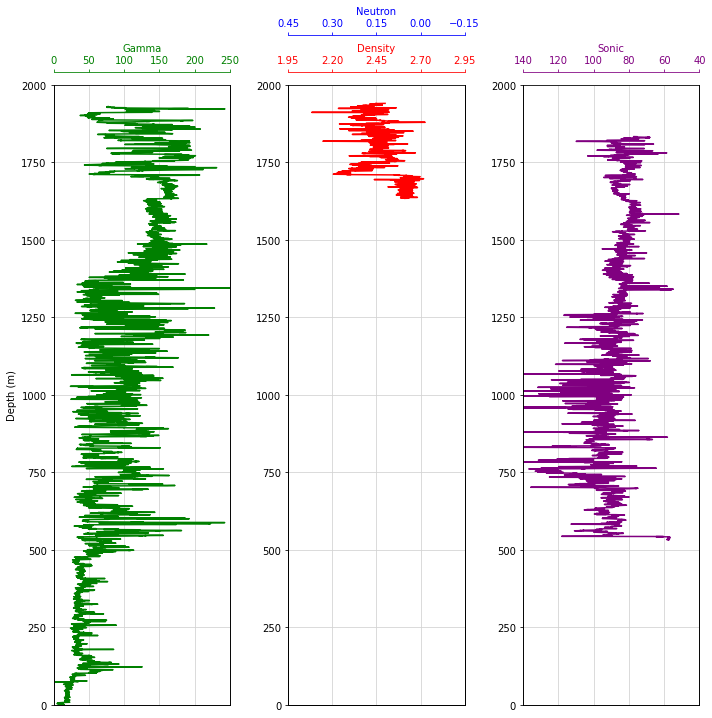

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPT", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 250)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200, 250])

# Density track
ax2.plot("RHOB", "DEPT", data = well, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Sonic track
ax3.plot("DT", "DEPT", data = well, color = "purple")
ax3.set_xlabel("Sonic")
ax3.set_xlim(140, 40)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPT", data = well, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(0, 2000)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, 2000)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()